In [1]:
# Created by Dusan Radivojevic, 2020
# This script is for statistical testing of models created in HARCreateModels script
# Load dataset
import numpy as np
X_train=[]
X_validation=[]
X_test=[]
Y_train=[]
Y_validation=[]
Y_test=[]
with open('Train1.npy', 'rb') as f:
    X_train = np.load(f)
    Y_train = np.load(f)
with open('Validation1.npy', 'rb') as f1:
    X_validation = np.load(f1)
    Y_validation = np.load(f1)
with open('Test1.npy', 'rb') as f2:
    X_test = np.load(f2)
    Y_test = np.load(f2)


In [2]:
# Import DNN model from file
from keras.models import load_model
import tensorflow as tf
model = tf.keras.models.load_model('DNN.h5')

Using TensorFlow backend.


In [3]:
# Import RF and KNC models from file
import joblib
model1 = joblib.load('RF.sav')
model2 = joblib.load('KNC.sav')

In [6]:
# Testing with 50 random samples from test dataset
from scipy import stats
fl = open("Testing.txt", "w")
fl.write("Number,\tDNNbrP,\tRFbrP,\tKNCbrP,\tTTS1,\tTTP1,\tTTS2,\tTTP2,\tTTS3,\tTTP3\n")
for m in range(50):
    ListOfSamples=[]
    ListOfIndexes=[]
    for j in range(1000):
        ind=np.random.randint(0,1699)
        ListOfSamples.append(X_test[ind])
        ListOfIndexes.append(Y_test[ind])
    ListOfSamples=np.array(ListOfSamples)
    ModPred=np.argmax(model.predict(ListOfSamples),axis=1)
    ModPred=np.array(ModPred)
    ModBin=[]
    MBP=0
    for i in range (len(ListOfIndexes)):
        if (ListOfIndexes[i]==ModPred[i]):
            ModBin.append(0)
            MBP+=1
        else:
            ModBin.append(1)
    ModPred1=model1.predict(ListOfSamples)
    ModBin1=[]
    MBP1=0
    for i in range (len(ListOfIndexes)):
        if (ListOfIndexes[i]==ModPred1[i]):
            ModBin1.append(0)
            MBP1+=1
        else:
            ModBin1.append(1)
    ModPred2=model2.predict(ListOfSamples)
    ModBin2=[]
    MBP2=0
    for i in range (len(ListOfIndexes)):
        if (ListOfIndexes[i]==ModPred2[i]):
            ModBin2.append(0)
            MBP2+=1
        else:
            ModBin2.append(1)
    T1,tp1=stats.ttest_rel(ModBin2,ModBin)
    T2,tp2=stats.ttest_rel(ModBin2,ModBin1)
    T3,tp3=stats.ttest_rel(ModBin1,ModBin)
    fl.write(str(m)+',\t'+str(MBP)+',\t'+str(MBP1)+',\t'+str(MBP2)+',\t'+str(T1)+',\t'+str(tp1)+',\t'+str(T2)+',\t'+str(tp2)+',\t'+str(T3)
        +',\t'+str(tp3)+'\n')
    print("i",m)
fl.close()

i 0
i 1
i 2
i 3
i 4
i 5
i 6
i 7
i 8
i 9
i 10
i 11
i 12
i 13
i 14
i 15
i 16
i 17
i 18
i 19
i 20
i 21
i 22
i 23
i 24
i 25
i 26
i 27
i 28
i 29
i 30
i 31
i 32
i 33
i 34
i 35
i 36
i 37
i 38
i 39
i 40
i 41
i 42
i 43
i 44
i 45
i 46
i 47
i 48
i 49


In [4]:
# Confusion matrix create and test
from sklearn.metrics import confusion_matrix
yp=model.predict(X_test)
Pt1=np.argmax(yp,axis=1)
cm1=confusion_matrix(Y_test,Pt1)
Pt2=model1.predict(X_test)
cm2=confusion_matrix(Y_test,Pt2)
Pt3=model2.predict(X_test)
cm3=confusion_matrix(Y_test,Pt3)
print(cm3)

[[ 57   0   9   8  62  11   1   0  15   7]
 [  4 121   0  11  15   2   5   1   4   7]
 [ 21   0  10   6 111  20   0   0   2   0]
 [  1   0   0 145  13   5   0   0   6   0]
 [  3   0   0   4 160   2   0   0   0   1]
 [  9   0   0  18  81  53   0   1   5   3]
 [ 16   0  19   9  56   3  18   2   1  46]
 [ 11   0  23   5  85   5   0  23   1  17]
 [  0   0   0  76   0  19   0   0  75   0]
 [  2   0   0  51  74   1   6   0  10  26]]


In [20]:
# Import custom module with class for comparing of two confusion matrix
from machinelearning import confmatcomp

In [21]:
# Chose two CM to compare
Test = confmatcomp(cm1,cm2)
print(Test.__doc__)
print(Test.multiple_binomials_contrast.__doc__)


    Purpose:
    A class implementing confusion matrix comparison.
    
    Desription:
    You need to give two matrices as input argument and run various tests
    implemented as methods of the class.
    
    Implemented test methods are:
    1) Single binomial contrast (called by: Test_instance_name.single_binomial_contrast(args) )
    2) Mutiple binomial contrast (called by: Test_instance_name.multiple_binomials_contrast(args) )
    3) Overall chi-square test (called by Test_instance_name.chi_square(args))
    
    Reference: 
    J. Rodrigues-Avi et al., "Methods for comparing two observed conusion matrices",...(201X)
    
    

        Function: multiple_binomials_contrast
        
        Purpose:
        This test makes individual tests by rows or columns.
        Default is test by columns.
           
        Description:
        We split problem into k-null hypotheses.
        Then we find Z estimator and fit it to normal distribution.
        After that k p-values are obt

In [22]:
Test.get_nm()

Total number of elements classified in A: 1700, and B: 1700


In [23]:
tolerance = 1e-6
Test.single_binomial_contrast(tolerance)

Null hypothesis is that these two proportions are the same.
Concordant elements proportion in 1st matrix: 0.790588
Concordant elements proportion in 2nd matrix: 0.751765
Global proportion of concordant elements differs by: 0.0388235294117647, 
Null hypothesis rejected!



Column-wise estimators for 1st and 2nd matrix and k-th null hypothesis testing:

Column 0 : 0.6712328767123288 0.7948717948717948 False
Column 1 : 0.9310344827586207 1.0 False
Column 2 : 0.5885167464114832 0.6721311475409836 False
Column 3 : 0.8841463414634146 0.9007633587786259 False
Column 4 : 0.8867924528301887 0.6631016042780749 False
Column 5 : 0.8136645962732919 0.6775956284153005 False
Column 6 : 0.7176470588235294 0.599009900990099 False
Column 7 : 0.84 0.7908496732026143 False
Column 8 : 0.9021739130434783 0.8770053475935828 False
Column 9 : 0.7103825136612022 0.6616161616161617 False


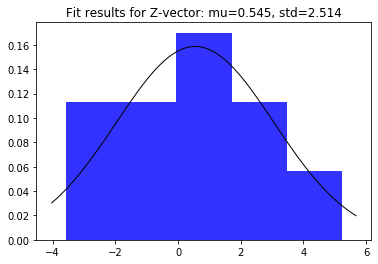


k p-values and Bonferonni's correction:

0 : 0.0218 0.0022
1 : 0.0003 0.0000
2 : 0.0854 0.0085
3 : 0.6458 0.0646
4 : 0.0000 0.0000
5 : 0.0032 0.0003
6 : 0.0150 0.0015
7 : 0.2690 0.0269
8 : 0.4387 0.0439
9 : 0.3044 0.0304

Row-wise estimators for 1st and 2nd matrix and k-th null hypothesis testing:

Row 0 : 0.5764705882352941 0.5470588235294118 False
Row 1 : 0.9529411764705882 0.9352941176470588 False
Row 2 : 0.7235294117647059 0.7235294117647059 True
Row 3 : 0.8529411764705882 0.6941176470588235 False
Row 4 : 0.8294117647058824 0.7294117647058823 False
Row 5 : 0.7705882352941177 0.7294117647058823 False
Row 6 : 0.7176470588235294 0.711764705882353 False
Row 7 : 0.7411764705882353 0.711764705882353 False
Row 8 : 0.9764705882352941 0.9647058823529412 False
Row 9 : 0.7647058823529411 0.7705882352941177 False


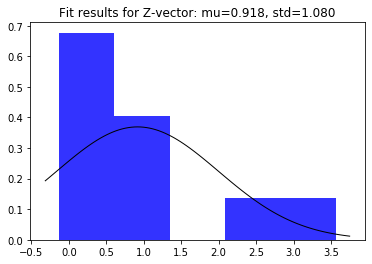


k p-values and Bonferonni's correction:

0 : 0.5845 0.0585
1 : 0.4784 0.0478
2 : 1.0000 0.1000
3 : 0.0004 0.0000
4 : 0.0251 0.0025
5 : 0.3801 0.0380
6 : 0.9044 0.0904
7 : 0.5428 0.0543
8 : 0.5206 0.0521
9 : 0.8978 0.0898


In [24]:
Test.multiple_binomials_contrast(tolerance)

Test.multiple_binomials_contrast(tolerance,column=False)

In [25]:
Test.chi_square()

Chi-squred test statistic: 94.981, p-value of the test:  1.622572250200868e-16


In [26]:
Test.multinomial_distance_bootstrap()

Estimate distance between vectors: 107.760063, 1465536.852274
